In [34]:
import matplotlib.pyplot as plt

from game import *
from erm import *

### The Townsend function and the game based on it

often used for benchmarking optimization algorithms
https://en.wikipedia.org/wiki/Test_functions_for_optimization

$ f(x,y) = -[cos((x-0.1)y)]^2 - x sin(3x+y)$

where 

$
{\displaystyle -2.25\leq x\leq 2.25},
{\displaystyle -2.5\leq y\leq 1.75}
$

In [35]:
def townsend(x,y):
    term1 = np.power( np.cos( (x-0.1)*y ), 2)
    term2 = x*np.sin( 3*x+y )
    return -term1 -term2

A_bounds = np.array([[-2.25, 2.5]])  #interval (-2.5;2.5) in one dimension only
B_bounds = np.array([[-2.25, 1.75]]) #interval (-2.5;1.75) in one dimension only

game_townsend = Game(A=HyperBlock(A_bounds), B=HyperBlock(B_bounds), u=townsend, name="townsend")


### Setting constants
$\epsilon = 10^{-6} $

$C = 10^{-11}$ (for ERM only)

$InitialStrategy$ is either $bounds$ or $random$. Choosing $bounds$ for better reproducibility

In [36]:
eps = 1e-6
C   = 5*1e-12
init_algorithm = "bounds"
maxiter=20

### Solving the game by the Double Oracle algorithm
implemented in double_oracle.py



In [37]:
from double_oracle import *
xs, p, ys, q, value_lbs, value_ubs = double_oracle(game=game_townsend, init_algorithm=init_algorithm, maxiter=maxiter, eps=eps)
DO_outcome = (xs, p, ys, q, value_lbs, value_ubs)
print("Value in Nash equilibrium: ", value_lbs[-1])


itr:  0
itr:  1
itr:  2
itr:  3
itr:  4
itr:  5
itr:  6
itr:  7
Value in Nash equilibrium:  -0.5579071628550105


/home/grifon/school/diplomka/final/oracles.py:29: OptimizeWarning: Unrecognized options detected: {'autoscale': True, 'sym_pos': False}. These will be passed to HiGHS verbatim.
  ret = sp.linprog( -function_vector, -boundary_matrix, np.zeros(height), eq_matrix, np.array([1]), bnds, method=lp_solver, options={'autoscale': True, 'sym_pos':False, 'maxiter':int(1e5)})
/home/grifon/school/diplomka/final/oracles.py:31: OptimizeWarning: Unrecognized options detected: {'autoscale': True, 'sym_pos': False}. These will be passed to HiGHS verbatim.
  ret = sp.linprog( function_vector, boundary_matrix, np.zeros(height), eq_matrix, np.array([1]), bnds, method=lp_solver, options={'autoscale': True, 'sym_pos':False, 'maxiter':int(1e5)})


### Solving the game by the Expected Regret Minimization algorithm
implemented in erm.py


In [38]:
from double_oracle import *
xs, p, ys, q, value_lbs, value_ubs = eps_nash_erm(game=game_townsend, C=C, init_algorithm=init_algorithm, maxiter=maxiter, eps=eps)
ERM_outcome = (xs, p, ys, q, value_lbs, value_ubs)
print("Value in Nash equilibrium: ", value_lbs[-1])

iter  0
T =  3
T =  8


iter  1
T =  12
T =  14
iter  2
T =  16
T =  17
iter  3
T =  19
T =  20
iter  4
T =  21
T =  21
iter  5
T =  22
T =  23
Value in Nash equilibrium:  -0.5495198927910963


### Plot convergennce

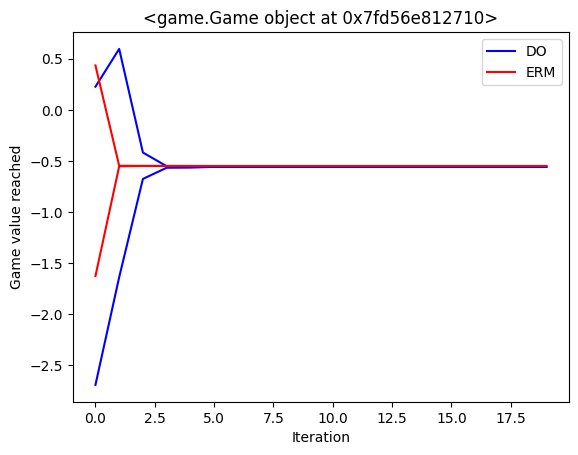

In [39]:
lower_bounds_do, upper_bounds_do = DO_outcome[4], DO_outcome[5]
lower_bounds_erm, upper_bounds_erm = ERM_outcome[4], ERM_outcome[5]

x_axis = np.arange(maxiter, dtype=int)
while len(lower_bounds_do) < len(x_axis):
    lower_bounds_do.append(lower_bounds_do[-1])
    upper_bounds_do.append(upper_bounds_do[-1])
while len(lower_bounds_erm) < len(x_axis):
    lower_bounds_erm.append(lower_bounds_erm[-1])
    upper_bounds_erm.append(upper_bounds_erm[-1])

plt.plot(x_axis, lower_bounds_do, color="blue")
plt.plot(x_axis, upper_bounds_do, color="blue", label="DO")
plt.plot(x_axis, lower_bounds_erm, color="red")
plt.plot(x_axis, upper_bounds_erm, color="red", label="ERM")
plt.legend()
plt.title(game_townsend)
plt.xlabel("Iteration")
plt.ylabel("Game value reached")
plt.show()